In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os 

In [2]:
df = pd.read_csv("F://googleplaystore.csv")

In [3]:
df .head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### dealing with missing values

#### dropping those indexes where the rating is missing

In [7]:
df.drop(index= df[df['Rating'].isnull()].index , inplace=True)


In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [9]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [10]:
#finding mode of the current ver column and replacing the missing values with that val 
mode_ = df['Current Ver'].mode()[0]
mode_

'Varies with device'

In [11]:
df['Current Ver'].fillna(mode_ , inplace= True)

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       3
dtype: int64

In [13]:
df.drop(index= df[df['Content Rating'].isnull()].index , inplace=True)


In [14]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [15]:
# here we are finding the mode value of the Android Ver Column and then storing it in the new variable called x
mode_1=df['Android Ver'].mode()[0]
mode_1

'4.1 and up'

In [16]:
df['Android Ver'].fillna(mode_1 ,inplace=True)

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Row and column numbers of any cells that has null, is empty or has "Varies with device" is assigned to related variables.

In [19]:
missing_cols, missing_rows = (
    (df.eq('').sum(x) | df.eq("Varies with device").sum(x))
    .loc[lambda x: x.gt(0)].index
    for x in (0, 1)
)
df.loc[missing_rows, missing_cols]

,Size,Current Ver,Android Ver
3,25M,Varies with device,4.2 and up
15,2.7M,Varies with device,4.2 and up
37,Varies with device,Varies with device,2.3.3 and up
42,Varies with device,Varies with device,Varies with device
52,Varies with device,Varies with device,Varies with device
...,...,...,...
10725,Varies with device,Varies with device,4.4 and up
10765,Varies with device,Varies with device,Varies with device
10826,Varies with device,Varies with device,Varies with device
10839,Varies with device,Varies with device,Varies with device


In [20]:
raw_data= df.copy()

In [21]:
raw_data = raw_data.drop(labels=list(missing_rows), axis=0)
raw_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


In [22]:
raw_data.shape

(7639, 13)

In [23]:
raw_data["App"] = raw_data['App'].astype('str')
raw_data["Category"] = raw_data['Category'].astype('str')
raw_data["Content Rating"] = raw_data['Content Rating'].astype('str')
raw_data["Genres"] = raw_data['Genres'].astype('str')

In [24]:
#convert the no of installations dtype to integer 
installs = []
for i in raw_data["Installs"]:
    i=i.replace(",","").replace("+","") #removing thousand seperators and + sign
    try:
        installs.append(int(i))
    except:
        installs.append(i)
raw_data["Installs"] = installs

In [25]:
raw_data['Installs'] = raw_data['Installs'].astype('int')

In [26]:
raw_data['Price'] = raw_data['Price'].str.replace('$','')

C:\Users\HP\AppData\Local\Temp\ipykernel_17568\1273836650.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw_data['Price'] = raw_data['Price'].str.replace('$','')


In [27]:
#converting kilobyte to megabyte
size = []
for i in raw_data["Size"]:
    if "k" in i:
        size.append(float(i[:-1])/1000) #converting the value to megabyte
    elif "M" in i:
        size.append(float(i[:-1]))
    else:
        size.append(i)
raw_data["Size"] = size

In [28]:
android_vers = []
for i in raw_data["Android Ver"]:
    if i=="Varies with device":
        android_vers.append(str(i))
    else:
        android_vers.append(str(i).split(" ")[0])
raw_data["Android Ver"] = android_vers

In [29]:
raw_data['Price'] = raw_data['Price'].astype('float')

raw_data['Last Updated']= pd.to_datetime(raw_data['Last Updated'], errors='coerce')

raw_data['Rating'] = raw_data['Rating'].astype('int')

raw_data['Reviews'] = raw_data['Reviews'].astype('float')

In [30]:
raw_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159.0,19.000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3,967.0,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510.0,8.700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967.0,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4,167.0,5.600,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3,1195.0,0.582,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4,44.0,0.619,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2
10834,FR Calculator,FAMILY,4,7.0,2.600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4,38.0,53.000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1


In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7639 entries, 0 to 10837
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             7639 non-null   object        
 1   Category        7639 non-null   object        
 2   Rating          7639 non-null   int32         
 3   Reviews         7639 non-null   float64       
 4   Size            7639 non-null   float64       
 5   Installs        7639 non-null   int32         
 6   Type            7639 non-null   object        
 7   Price           7639 non-null   float64       
 8   Content Rating  7639 non-null   object        
 9   Genres          7639 non-null   object        
 10  Last Updated    7639 non-null   datetime64[ns]
 11  Current Ver     7639 non-null   object        
 12  Android Ver     7639 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(7)
memory usage: 775.8+ KB


### dropping columns which donot seem to have impact on the rating

In [32]:
raw_data.drop(columns= ['Last Updated', 'Current Ver', 'Android Ver'], axis=1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159.0,19.000,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3,967.0,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510.0,8.700,5000000,Free,0.0,Everyone,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967.0,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4,167.0,5.600,50000,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3,1195.0,0.582,100000,Free,0.0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4,44.0,0.619,1000,Free,0.0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4,7.0,2.600,500,Free,0.0,Everyone,Education
10836,Sya9a Maroc - FR,FAMILY,4,38.0,53.000,5000,Free,0.0,Everyone,Education


#### checking whether the rating is greater than 5

In [33]:
raw_data[raw_data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### checking that the reviews are always less than the installs

In [34]:
sum(raw_data['Reviews']> raw_data['Installs'])

6

In [35]:
raw_data[raw_data['Reviews']>raw_data['Installs']].index

Int64Index([2454, 5917, 6700, 7402, 8591, 10697], dtype='int64')

###### dropping these indexes

In [36]:
indexes_to_drop= raw_data[raw_data['Reviews']>raw_data['Installs']].index
raw_data.drop(indexes_to_drop , inplace= True)

In [37]:
sum(raw_data['Reviews']> raw_data['Installs'])

0

In [38]:
raw_data['Price'] = pd.to_numeric(raw_data['Price'], errors='coerce')

In [39]:
prices = raw_data.loc[(raw_data['Price'] > 0), 'Price']
print(len(prices))
    

570


In [40]:
print(prices)

234       4.99
235       4.99
290       4.99
291       4.99
477       6.99
         ...  
10682     0.99
10690     0.99
10760     7.99
10782    16.99
10785     1.20
Name: Price, Length: 570, dtype: float64


In [41]:
print(sum(prices)//len(prices))

15.0


#### UNDERSTANDING THE OUTLIERS

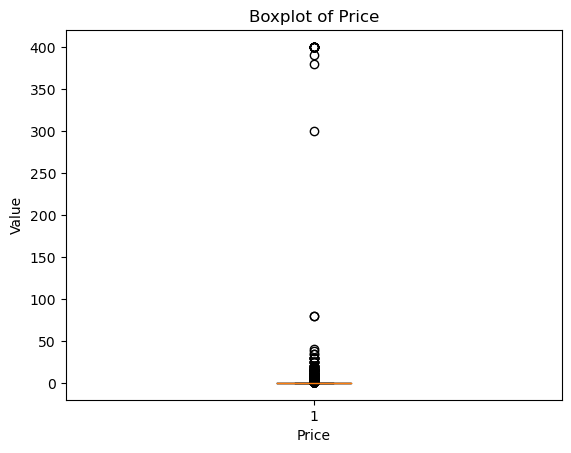

In [42]:
plt.boxplot(raw_data['Price'])
plt.xlabel('Price')
plt.ylabel('Value')
plt.title('Boxplot of Price')
plt.show()







we can see that some values lie above 250

In [43]:
rd= raw_data

In [44]:
rd[rd['Price']>250]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4,6.0,1.500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0
4362,💎 I'm rich,LIFESTYLE,3,718.0,26.000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4
4367,I'm Rich - Trump Edition,LIFESTYLE,3,275.0,7.300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1
5351,I am rich,LIFESTYLE,3,3547.0,1.800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3
5354,I am Rich Plus,FAMILY,4,856.0,8.700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4
5355,I am rich VIP,LIFESTYLE,3,411.0,2.600,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3
5356,I Am Rich Premium,FINANCE,4,1867.0,4.700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0
5357,I am extremely Rich,LIFESTYLE,2,41.0,2.900,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0
5358,I am Rich!,FINANCE,3,93.0,22.000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1
5359,I am rich(premium),FINANCE,3,472.0,0.965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4


In [45]:
sum(rd['Price']>250)

15

removing these outliers

In [46]:
# rd.drop(index=rd[rd['Price']>200].index,inplace=True)

In [47]:
rd

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159.0,19.000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3,967.0,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510.0,8.700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967.0,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4,167.0,5.600,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3,1195.0,0.582,100000,Free,0.0,Everyone,Weather,2014-02-16,6.0,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4,44.0,0.619,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2
10834,FR Calculator,FAMILY,4,7.0,2.600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4,38.0,53.000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1


#### ANALYSING AND VISUALISING THE DATASET 

What we are trying to understand?
-How many times an average free/paid app was downloaded?
-What is the average rating/size of a free/paid app?
-How many reviews does an average free/paid app receive?

In [48]:
pd.options.display.float_format = '{:.2f}'.format #to format resulting table in a way that all the numbers are given as 2 decimal points
averages = rd.groupby('Type', as_index=False).agg(Number_of_downloads = ('Installs', 'mean'), 
                                                                Rating = ('Rating','mean'), 
                                                                Size = ('Size', 'mean'),
                                                                Number_of_reviews = ('Reviews', 'mean'))

averages

,Type,Number_of_downloads,Rating,Size,Number_of_reviews
0,Free,8822526.58,3.75,23.08,317763.69
1,Paid,83120.67,3.80,20.76,7070.28


understanding the ratings across all the apps



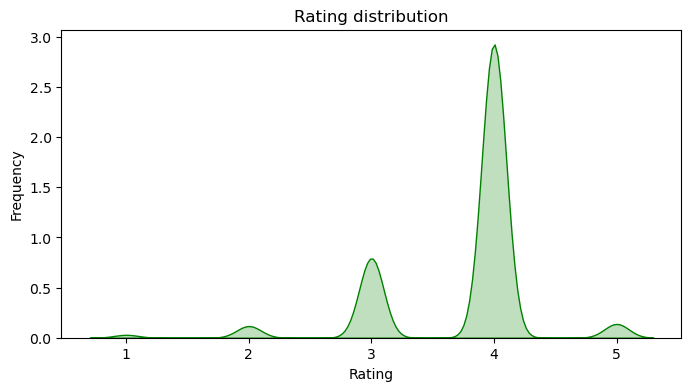

In [49]:
# rating distribution 
import seaborn as sns
plt.figure(figsize=(8,4))
g = sns.kdeplot(rd['Rating'], color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Rating distribution')
plt.show()

avg and max rating is around 4

LETS understand the relation between the number of reviews and number of downloads . to find that relation we will calculate the number of reviews per download 

In [50]:
def reviewsperdownload(avgs):
    forfree = float(avgs.Number_of_reviews[0])/float(avgs.Number_of_downloads[0])
    forpaid = float(avgs.Number_of_reviews[1])/float(avgs.Number_of_downloads[1])
    
    avgs['ReviewsPerDownload'] = np.array([forfree,forpaid])
    
    print(avgs)

reviewsperdownload(averages)

   Type  Number_of_downloads  Rating  Size  Number_of_reviews  \
0  Free           8822526.58    3.75 23.08          317763.69   
1  Paid             83120.67    3.80 20.76            7070.28   

   ReviewsPerDownload  
0                0.04  
1                0.09  


Conclusion
- the number of paid reviews are double the number of free reviews
- now we will try to understand which the relation between the price of an application with no. of reviews for both paid and free applications

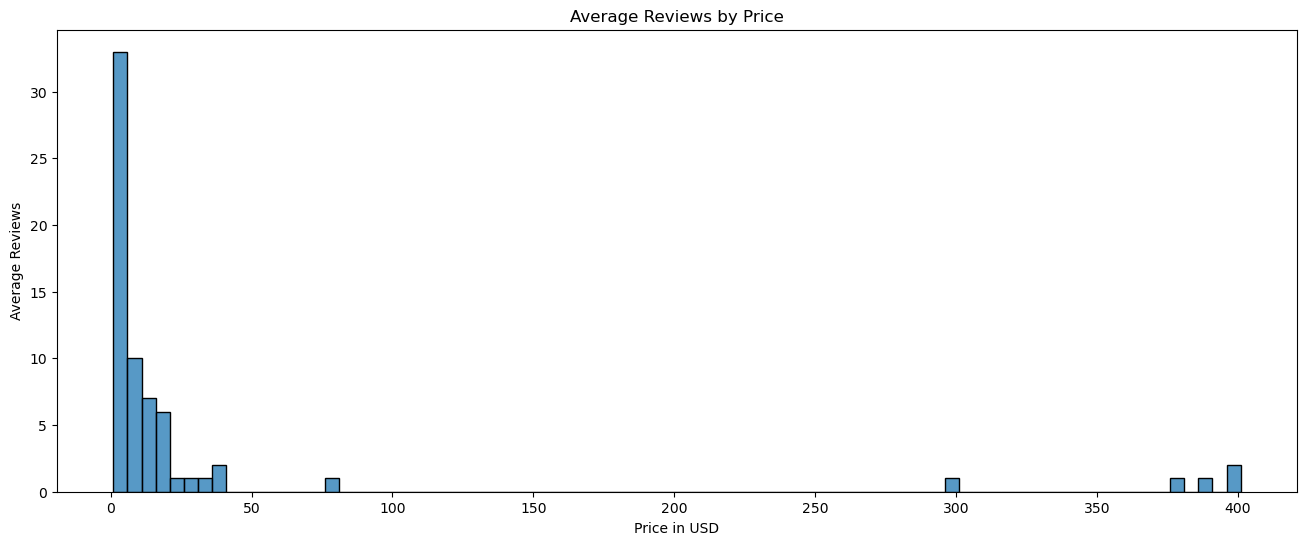

In [51]:
paid_app= raw_data[raw_data['Type']== 'Paid']
average_reviews = paid_app.groupby('Price', as_index=False).agg(Average_Reviews = ('Reviews', 'mean'))
plt.figure(figsize=(16,6))
sns.histplot(average_reviews, x=average_reviews['Price'], binwidth=5)
plt.xlabel('Price in USD')
plt.ylabel('Average Reviews')
plt.title('Average Reviews by Price')
plt.show()


reviews are mostly given to free apps or apps whose prices < 40 usd.
now lets understand the number of applications present in each category

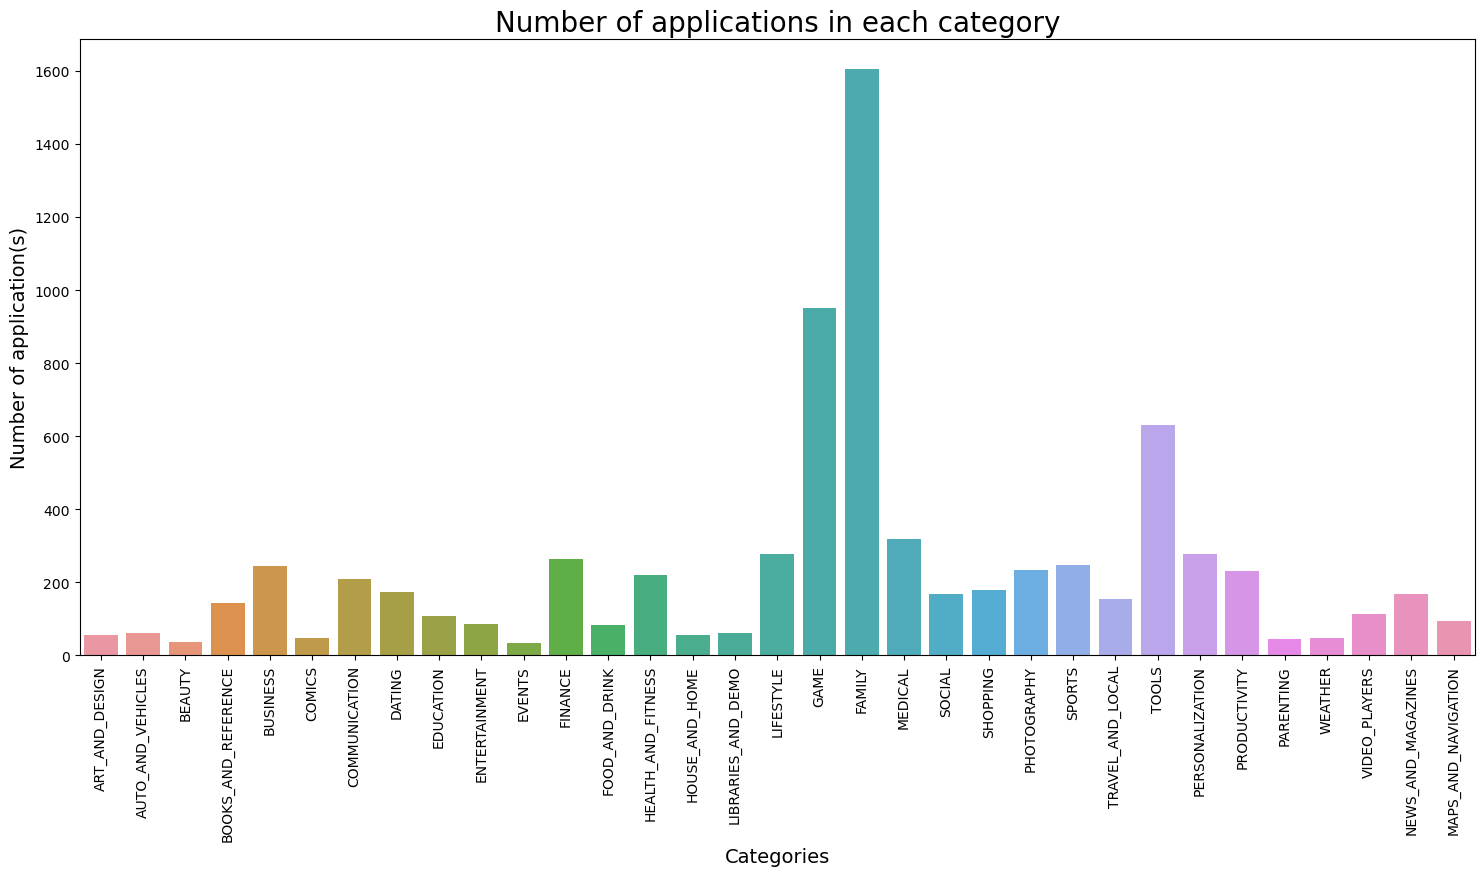

In [52]:
plt.figure(figsize=(18,8))
graph= sns.countplot(x="Category" , data= raw_data)
plt.title('Number of applications in each category',size = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel("Categories", size=14)
plt.ylabel("Number of application(s)", size=14)
plt.show()

maximum number of applications are present in the category 
- family 
- game 
- tools 


lets check the apps which have more than 10,000 downloads and 4.5+ rating  and <1million reviews and check which category dominates it 

In [53]:
modulated_data= raw_data[(raw_data.Installs>=1000) &(raw_data.Rating>=4.5 ) & (raw_data.Reviews<=100000)]


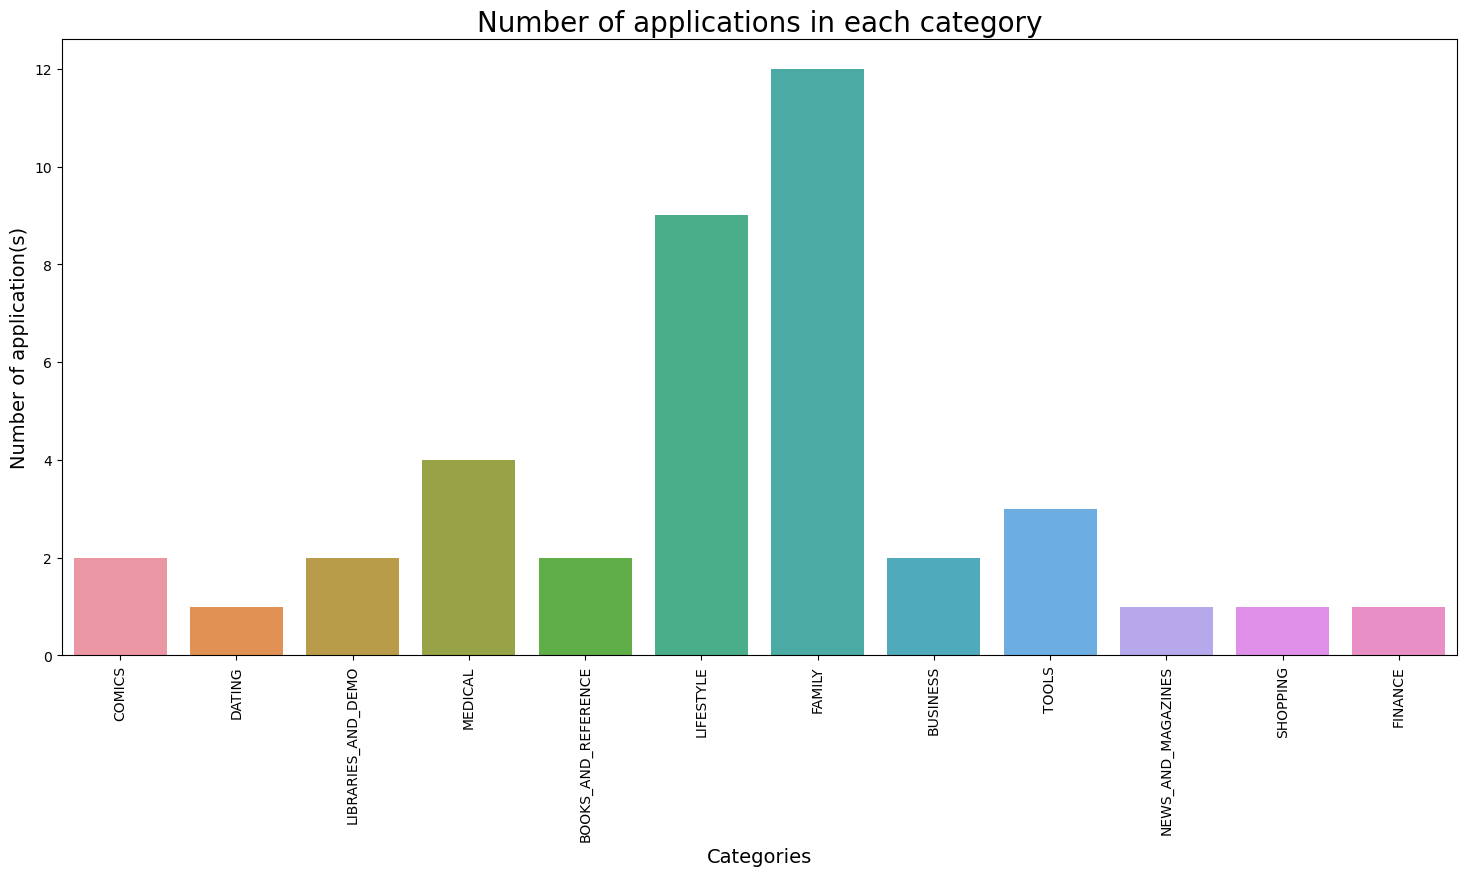

In [54]:
plt.figure(figsize=(18,8))
graph= sns.countplot(x="Category" , data= modulated_data)
plt.title('Number of applications in each category',size = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
plt.xlabel("Categories", size=14)
plt.ylabel("Number of application(s)", size=14)
plt.show()

checking the price distribution across these categories

In [55]:
average_price_per_category = paid_app.groupby('Category', as_index=False).agg(Average_Price = ('Price', 'mean'),
                                                                              Average_Rating = ('Rating', 'mean'))
average_price_per_category

,Category,Average_Price,Average_Rating
0,ART_AND_DESIGN,1.99,4.00
1,BOOKS_AND_REFERENCE,2.98,4.00
2,BUSINESS,6.14,3.60
3,COMMUNICATION,2.32,3.44
4,DATING,7.49,2.50
5,EDUCATION,4.49,4.00
6,ENTERTAINMENT,2.99,4.00
7,FAMILY,15.29,3.86
8,FINANCE,187.68,3.46
9,FOOD_AND_DRINK,4.99,4.00


Conclusions 
- most rated app belongs to the lifestyle category and least rated belongs to rating 
- most expensive app seems to belong to the healthcare category

In [56]:
raw_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159.00,19.00,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3,967.00,14.00,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510.00,8.70,5000000,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967.00,2.80,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4,167.00,5.60,50000,Free,0.00,Everyone,Art & Design,2017-03-26,1.0,2.3


lets see the average price of paid applications

In [57]:
price = paid_app.Price.mean()
price

15.224421052631438